In [365]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [366]:
df_insurance = pd.read_csv('insurance_part2_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'insurance_part2_data.csv'

In [ ]:
df_insurance.head()

In [ ]:
df_insurance.shape

In [ ]:
df_insurance.info()

In [ ]:
df_insurance.isnull().sum().sum()

In [ ]:
df_insurance[df_insurance.duplicated()].head()

In [ ]:
dups = df_insurance.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

## EDA

#### Univariate Analysis

In [367]:
df_insurance.describe(include='all')

,Age,Agency_Code,Type,Commision,Duration,Sales,Product Name,Destination
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,1.306333,0.612333,14.529203,70.001333,60.249913,1.661667,0.250000
std,10.463518,0.994060,0.487299,25.481455,134.053313,70.733954,1.258726,0.575277
min,8.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,0.000000,11.000000,20.000000,1.000000,0.000000
50%,36.000000,2.000000,1.000000,4.630000,26.500000,33.000000,2.000000,0.000000
75%,42.000000,2.000000,1.000000,17.235000,63.000000,69.000000,2.000000,0.000000
max,84.000000,3.000000,1.000000,210.210000,4580.000000,539.000000,4.000000,2.000000


<AxesSubplot:xlabel='Sales', ylabel='Count'>

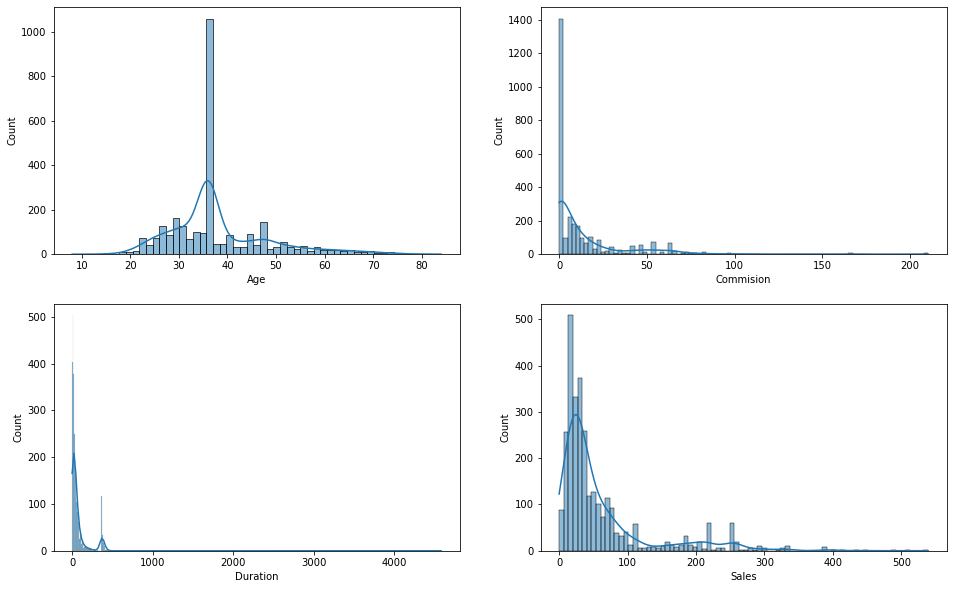

In [281]:
fig, axes = plt.subplots(nrows=2 , ncols=2, figsize=(16,10))
sns.histplot(df_insurance['Age'],kde= True , ax=axes[0][0])
sns.histplot(df_insurance['Commision'],kde= True , ax=axes[0][1])
sns.histplot(df_insurance['Duration'],kde= True , ax=axes[1][0])
sns.histplot(df_insurance['Sales'],kde= True , ax=axes[1][1])

<AxesSubplot:xlabel='Sales'>

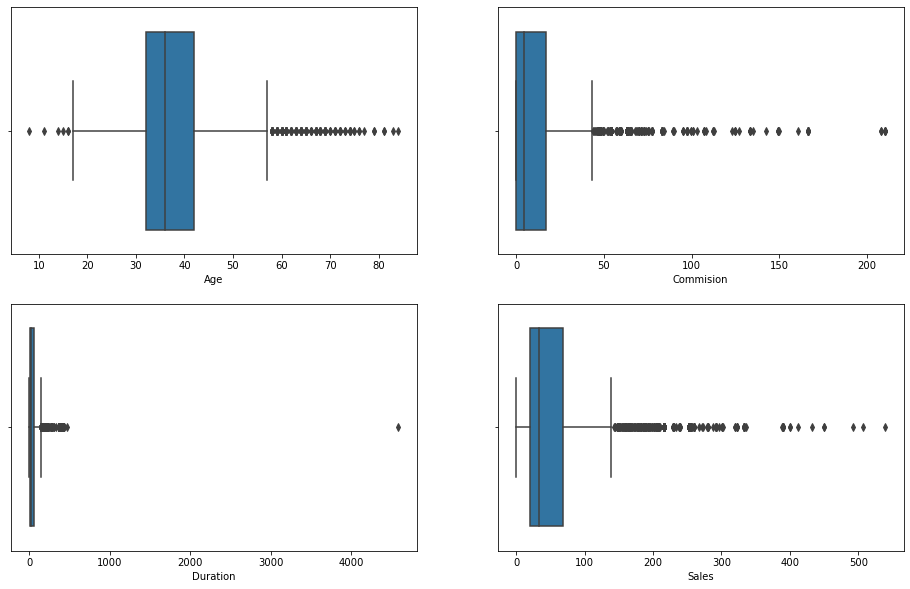

In [282]:
fig, axes = plt.subplots(nrows=2 , ncols=2, figsize=(16,10))
sns.boxplot(x ='Age', data=df_insurance ,ax =axes[0][0])
sns.boxplot(x ='Commision', data=df_insurance ,ax =axes[0][1])
sns.boxplot(x ='Duration', data=df_insurance ,ax =axes[1][0])
sns.boxplot(x ='Sales', data=df_insurance ,ax =axes[1][1])

In [283]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(df_cat[cat_column].value_counts(normalize = True))
    plt.figure()
    df_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [284]:
df_cat = df_insurance.select_dtypes(include='object')
list_cat_cols = list(df_cat.columns.values)
df_num = df_insurance.select_dtypes(include= ['int64','float64'])

Details of Agency_Code
----------------------------------------------------------------
EPX    0.455000
C2B    0.308000
CWT    0.157333
JZI    0.079667
Name: Agency_Code, dtype: float64


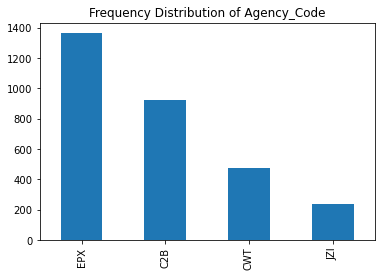

       
Details of Type
----------------------------------------------------------------
Travel Agency    0.612333
Airlines         0.387667
Name: Type, dtype: float64


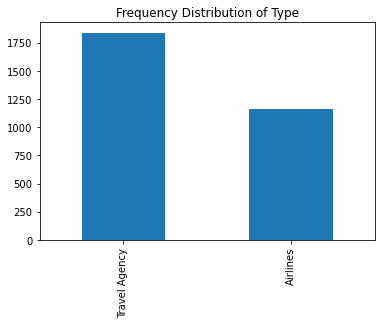

       
Details of Claimed
----------------------------------------------------------------
No     0.692
Yes    0.308
Name: Claimed, dtype: float64


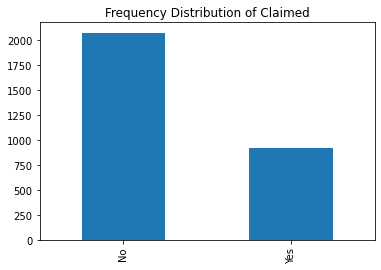

       
Details of Channel
----------------------------------------------------------------
Online     0.984667
Offline    0.015333
Name: Channel, dtype: float64


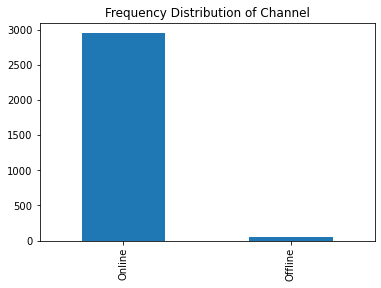

       
Details of Product Name
----------------------------------------------------------------
Customised Plan      0.378667
Cancellation Plan    0.226000
Bronze Plan          0.216667
Silver Plan          0.142333
Gold Plan            0.036333
Name: Product Name, dtype: float64


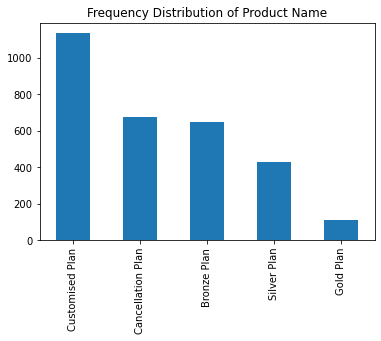

       
Details of Destination
----------------------------------------------------------------
ASIA        0.821667
Americas    0.106667
EUROPE      0.071667
Name: Destination, dtype: float64


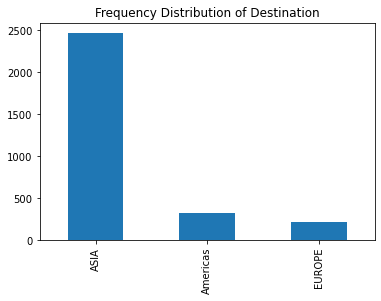

In [285]:
for x in list_cat_cols:
    univariateAnalysis_category(x)

## Bivariate Analysis

<AxesSubplot:>

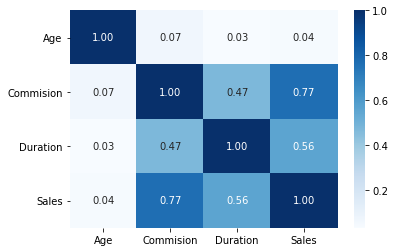

In [286]:
sns.heatmap(df_num.corr(), annot=True, fmt ='.2f', cmap='Blues')

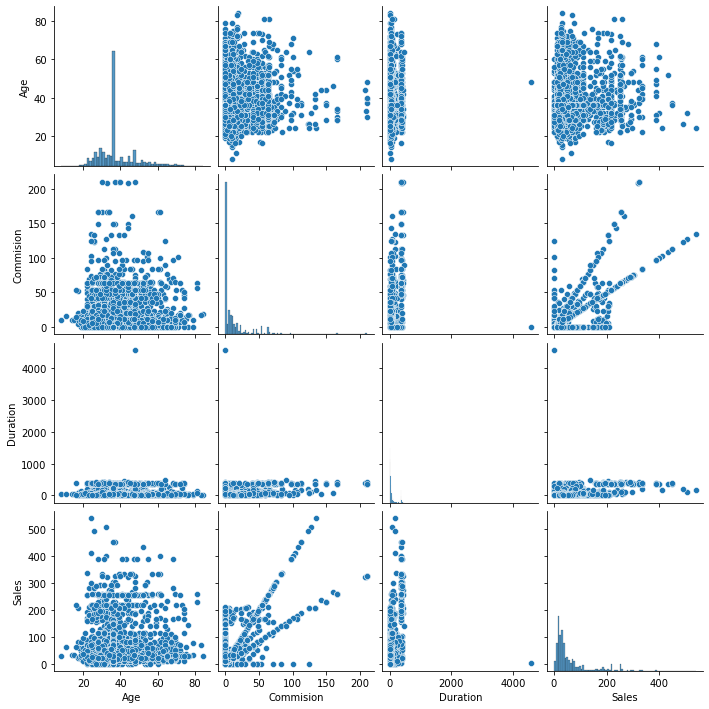

In [287]:
sns.pairplot(df_num)

## Multivariate Analysis

<AxesSubplot:xlabel='Claimed', ylabel='Age'>

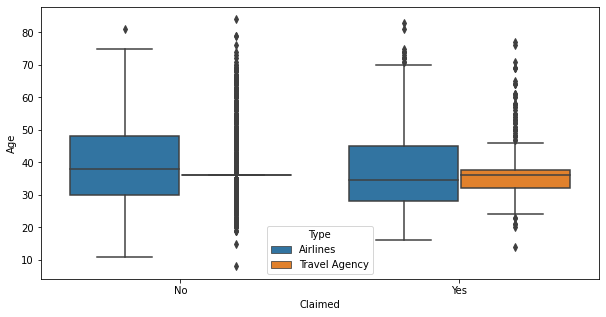

In [288]:
fig_dims = (10,5)
fig = plt.subplots(figsize = fig_dims)
sns.boxplot(x = 'Claimed', y='Age', hue='Type', data=df_insurance)

<AxesSubplot:xlabel='Claimed', ylabel='Commision'>

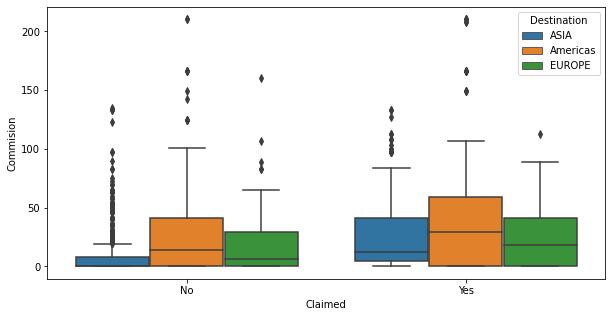

In [289]:
fig_dims = (10,5)
fig = plt.subplots(figsize = fig_dims)
sns.boxplot(x = 'Claimed', y='Commision', hue='Destination', data=df_insurance)

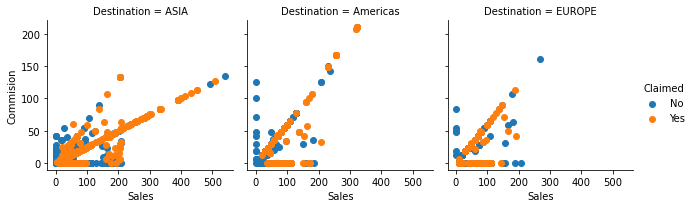

In [290]:
g = sns.FacetGrid(df_insurance, col='Destination', hue='Claimed', col_wrap=3, height=3)
g = g.map(plt.scatter,'Sales', 'Commision')
g.add_legend()

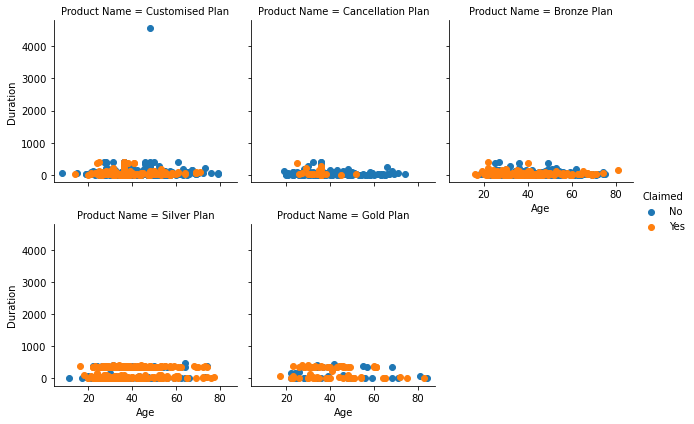

In [291]:
g = sns.FacetGrid(df_insurance, col='Product Name', hue='Claimed', col_wrap=3, height=3)
g = g.map(plt.scatter,'Age', 'Duration')
g.add_legend()

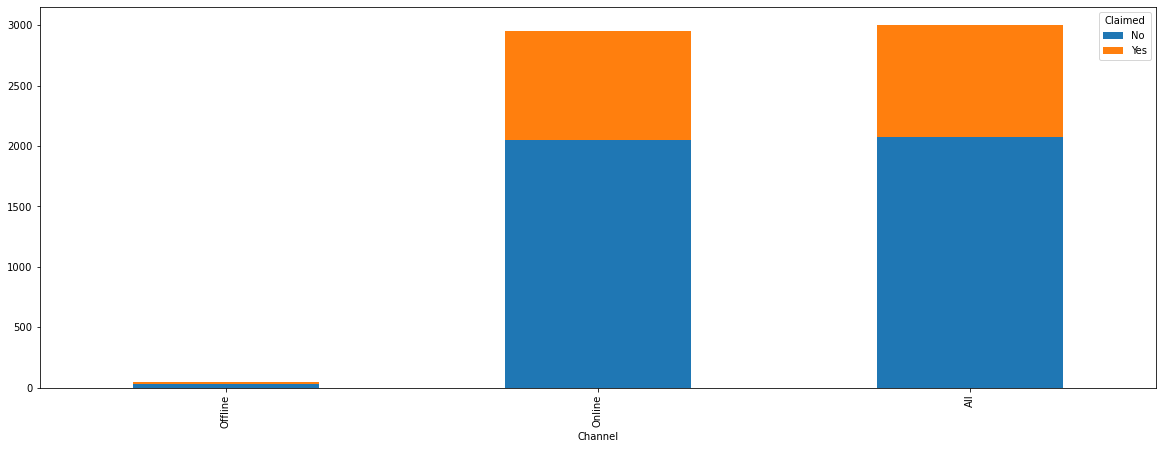

In [292]:
ct = pd.crosstab(df_insurance['Channel'], df_insurance['Claimed'],margins=True)
ct.drop('All',axis=1, inplace=True)
ct.plot.bar(stacked =True, figsize=(20,7))
plt.show()

In [293]:
df_insurance.columns

Index(['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel',
       'Duration', 'Sales', 'Product Name', 'Destination'],
      dtype='object')

In [294]:
df_insurance.drop('Channel',axis=1, inplace=True)

### Converting Object data type into Categorical

In [295]:
for column in df_insurance.columns:
    if df_insurance[column].dtype == 'object':
        df_insurance[column] = pd.Categorical(df_insurance[column]).codes
  
# C2B	0 , CWT	1 , EPX	2 , JZI	3
# NotClaimed	0 , Claimed	1


In [296]:
df_insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,7,2.51,2,0
1,36,2,1,0,0.00,34,20.00,2,0
2,39,1,1,0,5.94,3,9.90,2,1
3,36,2,1,0,0.00,4,26.00,1,0
4,33,3,0,0,6.30,53,18.00,0,0


In [297]:
df_insurance.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

No issue of class imbalance here as there are reasonable proportions of both classes.

### splitting data into training and test set for independent attributes

In [298]:
# Extract x and y
x = df_insurance.drop('Claimed',axis=1)
y = df_insurance.pop('Claimed')

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
x_train, x_test, train_labels, test_labels = train_test_split(x, y ,test_size=0.30, random_state=1)

In [301]:
print(x_train.shape)
print(x_test.shape)
print(train_labels.shape)
print(test_labels.shape)

(2100, 8)
(900, 8)
(2100,)
(900,)


## Decision Tree Classifier

In [302]:
from sklearn.model_selection import GridSearchCV

In [303]:
param_grid = {
    'criterion' : ['gini'],
    'max_depth': [5,6,7],
    'min_samples_leaf': [4,5,6],
    'min_samples_split': [80,90,100]
}

In [304]:
dt_model = DecisionTreeClassifier()

In [305]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid , cv=5)

In [306]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 6, 7],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [80, 90, 100]})

In [307]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 80}

In [308]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=80)

## Generating Tree

In [309]:
from sklearn import tree
train_char_label = ['No','Yes']
Ins_tree = open('Ins_tree.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file=Ins_tree, feature_names= list(x_train), class_names= list(train_char_label))
Ins_tree.close()

In [310]:
print(pd.DataFrame(best_grid.feature_importances_, columns= ['Importance'], index= df_insurance.columns).sort_values('Importance', ascending= False))

              Importance
Agency_Code     0.582444
Sales           0.250174
Product Name    0.072946
Duration        0.050082
Commision       0.028373
Age             0.015981
Type            0.000000
Destination     0.000000


## Predicting on training and testing datasets

In [311]:
ytrain_predict = best_grid.predict(x_train)

In [312]:
ytest_predict = best_grid.predict(x_test)

## Getting the Predicted classes and probabilities

In [313]:
ytest_predict_prob = best_grid.predict_proba(x_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.951220,0.048780
1,0.413793,0.586207
2,0.413793,0.586207
3,0.212389,0.787611
4,0.924419,0.075581


## AUC and ROC for training data

AUC : 0.842


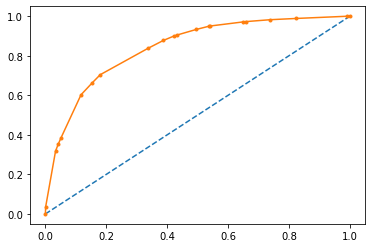

In [315]:
# Predict probabilities for Train data
probs = best_grid.predict_proba(x_train)
probs = probs[: , 1]

# Calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC : %.3f' % cart_train_auc)

# Calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0,1], [0,1], linestyle = '--')

# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')

plt.show()

AUC : 0.842


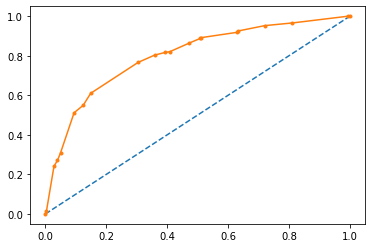

In [316]:
# Predict probabilities for Test Data
probs = best_grid.predict_proba(x_test)
probs = probs[: , 1]

# Calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC : %.3f' % cart_train_auc)

# Calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0,1], [0,1], linestyle = '--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')

plt.show()

## Confusion matrix for training data

In [317]:
from sklearn.metrics import confusion_matrix , classification_report

In [318]:
# Train data Accuracy
cart_train_acc = best_grid.score(x_train,train_labels)
cart_train_acc

0.799047619047619

In [319]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1471
           1       0.69      0.60      0.64       629

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.80      2100



In [320]:
cart_metrics = classification_report(train_labels, ytrain_predict, output_dict=True)
df = pd.DataFrame(cart_metrics).transpose()

cart_train_precision =  round(df.loc['1'][0],2)
cart_train_recall =  round(df.loc['1'][1],2)
cart_train_f1 =  round(df.loc['1'][2],2)
print('cart_train_precision :',cart_train_precision)
print('cart_train_recall :',cart_train_recall)
print('cart_train_f1 :',cart_train_f1)

cart_train_precision : 0.69
cart_train_recall : 0.6
cart_train_f1 : 0.64


In [321]:
# Test data Accuracy
cart_test_acc = best_grid.score(x_test,test_labels)
cart_test_acc

0.7766666666666666

In [324]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       605
           1       0.73      0.51      0.60       295

    accuracy                           0.78       900
   macro avg       0.76      0.71      0.72       900
weighted avg       0.77      0.78      0.76       900



In [325]:
cart_metrics = classification_report(test_labels, ytest_predict, output_dict=True)
df = pd.DataFrame(cart_metrics).transpose()

cart_test_precision =  round(df.loc['1'][0],2)
cart_test_recall =  round(df.loc['1'][1],2)
cart_test_f1 =  round(df.loc['1'][2],2)
print('cart_test_precision :',cart_test_precision)
print('cart_test_recall :',cart_test_recall)
print('cart_test_f1 :',cart_test_f1)

cart_test_precision : 0.73
cart_test_recall : 0.51
cart_test_f1 : 0.6


## Building a Random Forest Classifier

In [326]:
param_grid = {
    'max_depth': [4,5,6],
    'max_features': [7,8],
    'min_samples_leaf': [10,15,20],
    'min_samples_split': [30,40],
    'n_estimators': [200,300,400]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [327]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [7, 8],
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': [30, 40],
                         'n_estimators': [200, 300, 400]})

In [328]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 8,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 300}

In [329]:
best_grid = grid_search.best_estimator_

In [330]:
best_grid

RandomForestClassifier(max_depth=5, max_features=8, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=300)

## Predicting the training and testing data

In [331]:
ytrain_predict = best_grid.predict(x_train)
ytest_predict = best_grid.predict(x_test)

## RF Model performance Evaluation on training data

In [332]:
confusion_matrix(train_labels, ytrain_predict)

array([[1313,  158],
       [ 243,  386]], dtype=int64)

In [333]:
rf_train_acc =  best_grid.score(x_train, train_labels)
rf_train_acc

0.809047619047619

In [334]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1471
           1       0.71      0.61      0.66       629

    accuracy                           0.81      2100
   macro avg       0.78      0.75      0.76      2100
weighted avg       0.80      0.81      0.80      2100



In [335]:
rf_metrics = classification_report(train_labels, ytrain_predict, output_dict=True)
df = pd.DataFrame(rf_metrics).transpose()

rf_train_precision =  round(df.loc['1'][0],2)
rf_train_recall =  round(df.loc['1'][1],2)
rf_train_f1 =  round(df.loc['1'][2],2)
print('rf_train_precision :',rf_train_precision)
print('rf_train_recall :',rf_train_recall)
print('rf_train_f1 :',rf_train_f1)

rf_train_precision : 0.71
rf_train_recall : 0.61
rf_train_f1 : 0.66


Area Under the Curve : 0.859


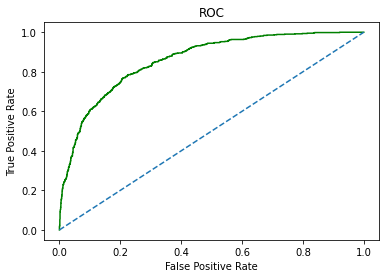

In [336]:
rf_train_fpr, rf_train_tpr,_ = roc_curve(train_labels, best_grid.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr, color='green')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

# Calculate AUC
rf_train_auc = roc_auc_score(train_labels, best_grid.predict_proba(x_train)[:,1])
print('Area Under the Curve : %.3f' % rf_train_auc)

## RF Model performance Evaluation on testing data

In [337]:
confusion_matrix(test_labels, ytest_predict)

array([[547,  58],
       [149, 146]], dtype=int64)

In [338]:
rf_test_acc = best_grid.score(x_test, test_labels)
rf_test_acc

0.77

In [339]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       605
           1       0.72      0.49      0.59       295

    accuracy                           0.77       900
   macro avg       0.75      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [340]:
rf_metrics = classification_report(test_labels, ytest_predict, output_dict=True)
df = pd.DataFrame(rf_metrics).transpose()

rf_test_precision =  round(df.loc['1'][0],2)
rf_test_recall =  round(df.loc['1'][1],2)
rf_test_f1 =  round(df.loc['1'][2],2)
print('rf_test_precision :',rf_test_precision)
print('rf_test_recall :',rf_test_recall)
print('rf_test_f1 :',rf_test_f1)

rf_test_precision : 0.72
rf_test_recall : 0.49
rf_test_f1 : 0.59


Area Under the Curve : 0.818


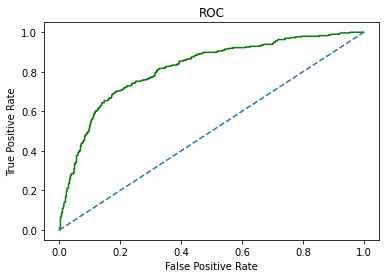

In [341]:
# Predict probabilities for Test data
rf_test_fpr, rf_test_tpr,_ = roc_curve(test_labels, best_grid.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr, color='green')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

# Calculate AUC
rf_test_auc = roc_auc_score(test_labels, best_grid.predict_proba(x_test)[:,1])
print('Area Under the Curve : %.3f' % rf_test_auc)

In [342]:
# Variable Importance
print(pd.DataFrame(best_grid.feature_importances_, columns= ['Importance'], index= x_train.columns).sort_values('Importance', ascending=False))

              Importance
Agency_Code     0.494861
Sales           0.228095
Product Name    0.091885
Duration        0.067013
Commision       0.063010
Age             0.049359
Destination     0.004624
Type            0.001153


## Building a Neural Network Classifier

In [343]:
# Scaling variables
from sklearn.preprocessing import StandardScaler

In [344]:
sc = StandardScaler()
x_trains = sc.fit_transform(x_train)

In [345]:
x_tests = sc.transform(x_test)

In [346]:
x_tests

array([[-1.55684893, -0.27851251,  0.80520286, ...,  0.18683534,
        -1.34097044,  2.99629421],
       [ 1.66047173, -1.28518425, -1.24192306, ..., -0.48325974,
        -1.34097044, -0.43926017],
       [-0.87438698, -1.28518425, -1.24192306, ..., -0.62833187,
        -1.34097044, -0.43926017],
       ...,
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.47635155,
        -1.34097044, -0.43926017],
       [ 1.07550434,  1.73483096, -1.24192306, ..., -0.43490237,
        -1.34097044, -0.43926017],
       [-0.28941958,  1.73483096, -1.24192306, ..., -0.49016794,
        -1.34097044, -0.43926017]])

In [347]:
x_trains

array([[-0.19192502,  0.72815922,  0.80520286, ..., -0.5730663 ,
         0.24642411, -0.43926017],
       [-0.19192502,  0.72815922,  0.80520286, ..., -0.26910565,
         0.24642411,  1.27851702],
       [-0.97188154, -1.28518425, -1.24192306, ...,  1.74601534,
         1.83381865, -0.43926017],
       ...,
       [-0.19192502,  0.72815922,  0.80520286, ...,  0.02103862,
         0.24642411, -0.43926017],
       [ 0.58803151,  1.73483096, -1.24192306, ..., -0.60069909,
        -1.34097044, -0.43926017],
       [-0.19192502, -1.28518425, -1.24192306, ..., -0.53852532,
         1.83381865, -0.43926017]])

In [348]:
param_grid = {
    'hidden_layer_sizes': [(300,200,100)],
    'activation': ['logistic','relu'],
    'solver':['sgd','adam'],
    'tol': [0.01, 0.001],
    'max_iter': [100000]
}

In [349]:
# Building Neural Network Model
nncl =  MLPClassifier()
grid_search = GridSearchCV(estimator=nncl, param_grid=param_grid, cv=5)

In [350]:
grid_search.fit(x_train, train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(300, 200, 100)],
                         'max_iter': [100000], 'solver': ['sgd', 'adam'],
                         'tol': [0.01, 0.001]})

In [351]:
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (300, 200, 100),
 'max_iter': 100000,
 'solver': 'adam',
 'tol': 0.001}

In [352]:
best_grid =  grid_search.best_estimator_
best_grid

MLPClassifier(activation='logistic', hidden_layer_sizes=(300, 200, 100),
              max_iter=100000, tol=0.001)

## Predicting the Training and Testing data

In [353]:
ytrain_predict = best_grid.predict(x_trains)
ytest_predict = best_grid.predict(x_tests)

## NN Model Performance Evaluation on Training data

In [354]:
confusion_matrix(train_labels, ytrain_predict)

array([[1432,   39],
       [ 489,  140]], dtype=int64)

In [355]:
nn_train_acc =  best_grid.score(x_trains, train_labels)
nn_train_acc

0.7485714285714286

In [356]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84      1471
           1       0.78      0.22      0.35       629

    accuracy                           0.75      2100
   macro avg       0.76      0.60      0.60      2100
weighted avg       0.76      0.75      0.70      2100



In [357]:
nn_metrics = classification_report(train_labels, ytrain_predict, output_dict=True)
df = pd.DataFrame(nn_metrics).transpose()

nn_train_precision =  round(df.loc['1'][0],2)
nn_train_recall =  round(df.loc['1'][1],2)
nn_train_f1 =  round(df.loc['1'][2],2)
print('nn_train_precision :',nn_train_precision)
print('nn_train_recall :',nn_train_recall)
print('nn_train_f1 :',nn_train_f1)

nn_train_precision : 0.78
nn_train_recall : 0.22
nn_train_f1 : 0.35


In [358]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       605
           1       0.86      0.19      0.32       295

    accuracy                           0.73       900
   macro avg       0.79      0.59      0.57       900
weighted avg       0.76      0.73      0.66       900



In [359]:
nn_metrics = classification_report(test_labels, ytest_predict, output_dict=True)
df = pd.DataFrame(nn_metrics).transpose()

nn_test_precision =  round(df.loc['1'][0],2)
nn_test_recall =  round(df.loc['1'][1],2)
nn_test_f1 =  round(df.loc['1'][2],2)
print('nn_test_precision :',nn_test_precision)
print('nn_test_recall :',nn_test_recall)
print('nn_test_f1 :',nn_test_f1)

nn_test_precision : 0.86
nn_test_recall : 0.19
nn_test_f1 : 0.32


Area Under the Curve : 0.786


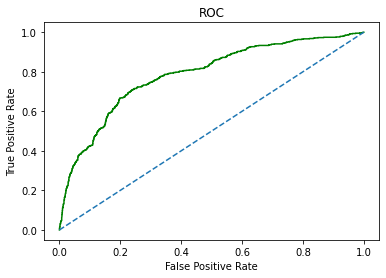

In [360]:
# Predict probabilities for Train data
nn_train_fpr, nn_train_tpr,_ = roc_curve(train_labels, best_grid.predict_proba(x_trains)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr, color='green')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

# Calculate AUC
nn_train_auc = roc_auc_score(train_labels, best_grid.predict_proba(x_trains)[:,1])
print('Area Under the Curve : %.3f' % nn_train_auc)

Area Under the Curve : 0.818


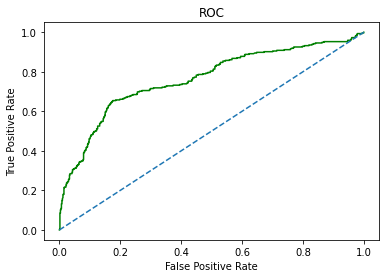

In [361]:
# Predict probabilities for Test data
nn_test_fpr, nn_test_tpr,_ = roc_curve(test_labels, best_grid.predict_proba(x_tests)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr, color='green')
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')

# Calculate AUC
nn_test_auc = roc_auc_score(test_labels, best_grid.predict_proba(x_tests)[:,1])
print('Area Under the Curve : %.3f' % rf_test_auc)

## Comparison of performance metrics from the 3 models

In [362]:
index = ['Accuracy','AUC','Recall','Precision','F1 score']
data = pd.DataFrame({'CART Train' : [cart_train_acc, cart_train_auc, cart_train_recall, cart_train_precision, cart_train_f1],
                    'CART_Test' : [cart_test_acc,cart_test_auc]})

ValueError: arrays must all be same length